In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [2]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Mach-Zender/Refractive index", 
              r"/Users/karsten/Eksperimentel fysik II/Experimentel-Physics-2/Mach-Zender/Polarization filter/no1/MatLab/"]



entries_list = os.listdir("/Users/karsten/Eksperimentel fysik II/Experimentel-Physics-2/Mach-Zender/Polarization filter/no1/MatLab")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/karsten/Eksperimentel fysik II/Experimentel-Physics-2/Mach-Zender/Polarization filter/no1/MatLab'

In [3]:
print(entries_list[18])

48.mat


In [4]:
def get_data(entry):
    data = io.loadmat(path_array[1] + entry)
    length = data.get("Length")[0][0]
    Tinterval = data.get("Tinterval")[0][0]
    Tstart = data.get("Tstart")[0][0]
    
    t = np.arange(Tstart, Tinterval*length, Tinterval)
    V = np.transpose(data.get("A"))[0]
    
    return t, V


In [10]:
Vs = []
ts = []
Vvar = []
thetas = []
means = []


for entry in entries_list:
    t, V = get_data(entry)
    ts.append(t)
    Vs.append(V)
    var = np.var(V)
    mean = np.mean(V)
    means.append(mean)
    Vvar.append(var)
    name = entry.replace(".mat", "")
    theta = float(name)*np.pi/180*2
    thetas.append(theta)

2.005155745533412


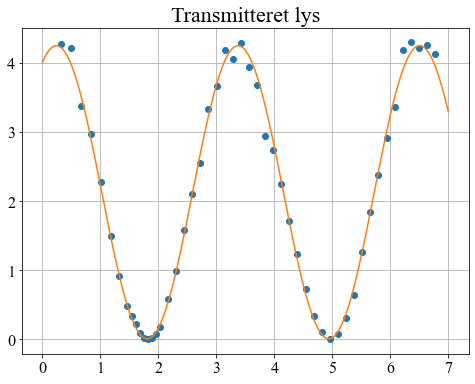

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Reflekteret lys")
ax.set_title("Transmitteret lys")
ax.grid()
ax.plot(thetas, Vvar, 'o')

def f(t, a,b,c,d):
    e = a*(1+b*np.cos(c*t+d))
    return e

cs, cov = curve_fit(f, thetas, Vvar,p0=[2,4,2,0], absolute_sigma=True)

tl = np.linspace(0, 3.5*2, 300)
ax.plot(tl, f(tl,cs[0],cs[1],cs[2],cs[3]))
print(cs[2])

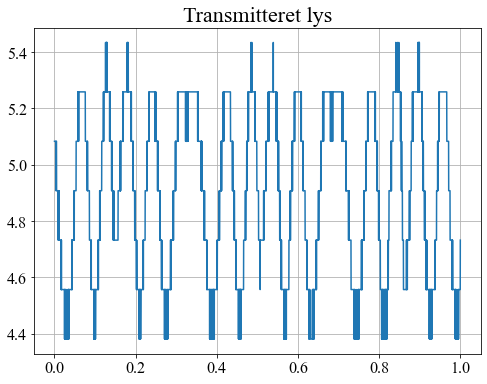

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Reflekteret lys")
ax.set_title("Transmitteret lys")
ax.grid()
ax.plot(ts[18], Vs[18], '-')